In [66]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "./data"]).decode("utf8"))


data.zip
destinations.csv
head_data.ods
head_test.csv
head_train.csv
sample_submission.csv
test.csv
train.csv



In [67]:
# Get first 10000 rows and print some info about columns
train = pd.read_csv("./data/train.csv", parse_dates=['srch_ci', 'srch_co'], nrows=1000000)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
date_time                    1000000 non-null object
site_name                    1000000 non-null int64
posa_continent               1000000 non-null int64
user_location_country        1000000 non-null int64
user_location_region         1000000 non-null int64
user_location_city           1000000 non-null int64
orig_destination_distance    629753 non-null float64
user_id                      1000000 non-null int64
is_mobile                    1000000 non-null int64
is_package                   1000000 non-null int64
channel                      1000000 non-null int64
srch_ci                      999002 non-null datetime64[ns]
srch_co                      999001 non-null datetime64[ns]
srch_adults_cnt              1000000 non-null int64
srch_children_cnt            1000000 non-null int64
srch_rm_cnt                  1000000 non-null int64
srch_destination_id          1000000 n

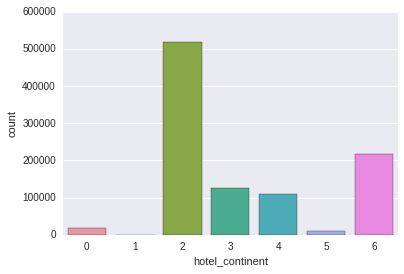

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
# preferred continent destinations
sns.countplot(x='hotel_continent', data=train)

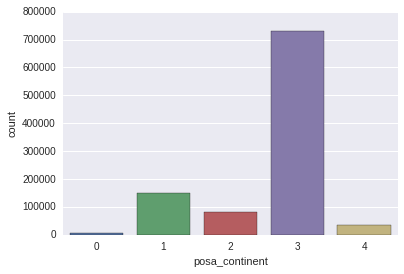

In [69]:
# most of people booking are from continent 3 I guess is one of the rich continent?
sns.countplot(x='posa_continent', data=train)

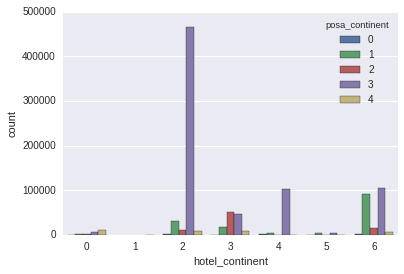

In [70]:
# putting the two above together
sns.countplot(x='hotel_continent', hue='posa_continent', data=train)

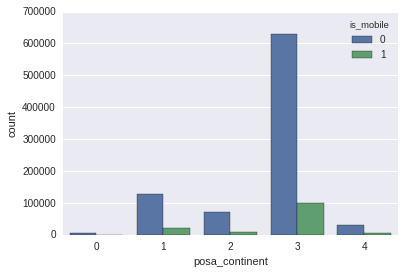

In [71]:
# how many people by continent are booking from mobile
sns.countplot(x='posa_continent', hue='is_mobile', data = train)

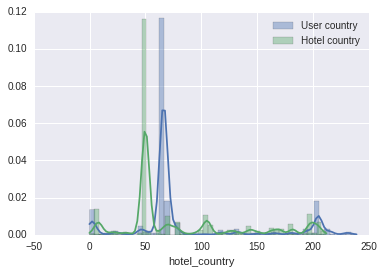

In [72]:
# Difference between user and destination country
sns.distplot(train['user_location_country'], label="User country")
sns.distplot(train['hotel_country'], label="Hotel country")
plt.legend()

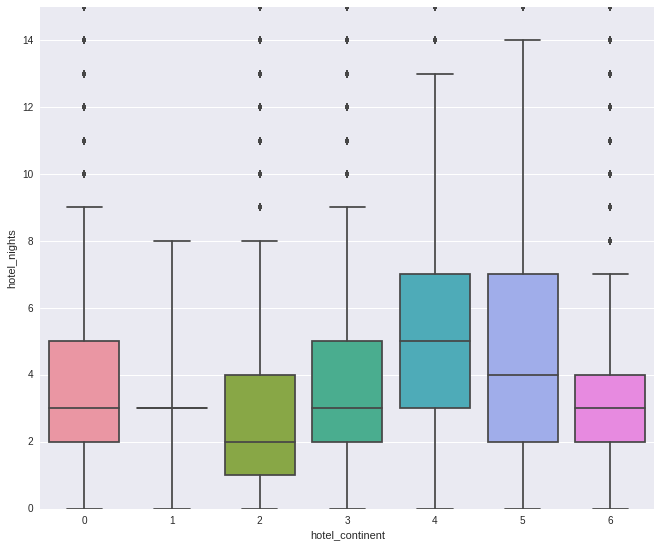

In [95]:
import numpy as np
# get number of booked nights as difference between check in and check out
hotel_nights = train['srch_co'] - train['srch_ci'] 
hotel_nights = (hotel_nights / np.timedelta64(1, 'D')).astype(float) # convert to float to avoid NA problems
train['hotel_nights'] = hotel_nights
train.loc[train['hotel_nights']<0, "hotel_nights"]=0

plt.figure(figsize=(11, 9))
ax = sns.boxplot(x='hotel_continent', y='hotel_nights', data=train)
lim = ax.set(ylim=(0, 15))

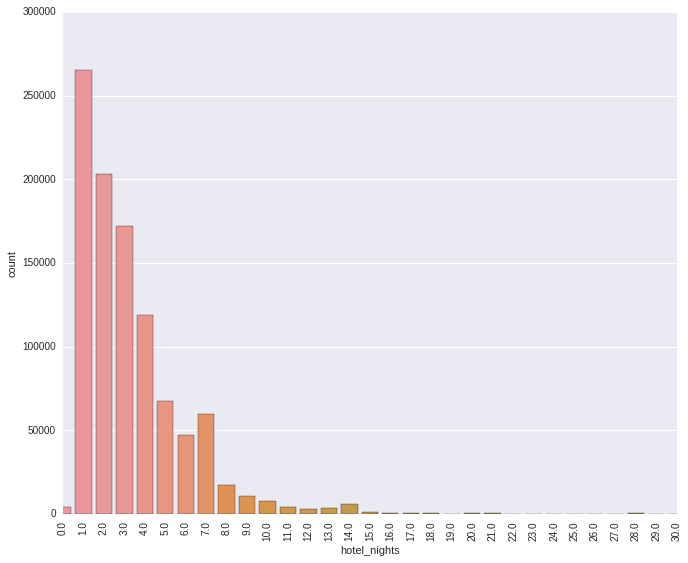

In [97]:
plt.figure(figsize=(11, 9))

p=sns.countplot(x="hotel_nights", data=train)
p.set(xlim=(0, 30))

for item in p.get_xticklabels():
    item.set_rotation(90)


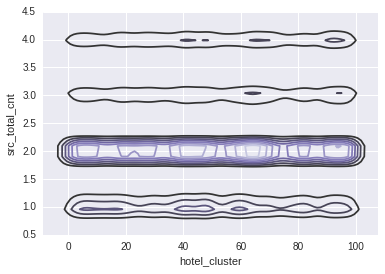

In [98]:

# distribution of the total number of people per cluster
src_total_cnt = train.srch_adults_cnt + train.srch_children_cnt
train['src_total_cnt'] = src_total_cnt
ax = sns.kdeplot(train['hotel_cluster'], train['src_total_cnt'], cmap="Purples_d")
lim = ax.set(ylim=(0.5, 4.5))

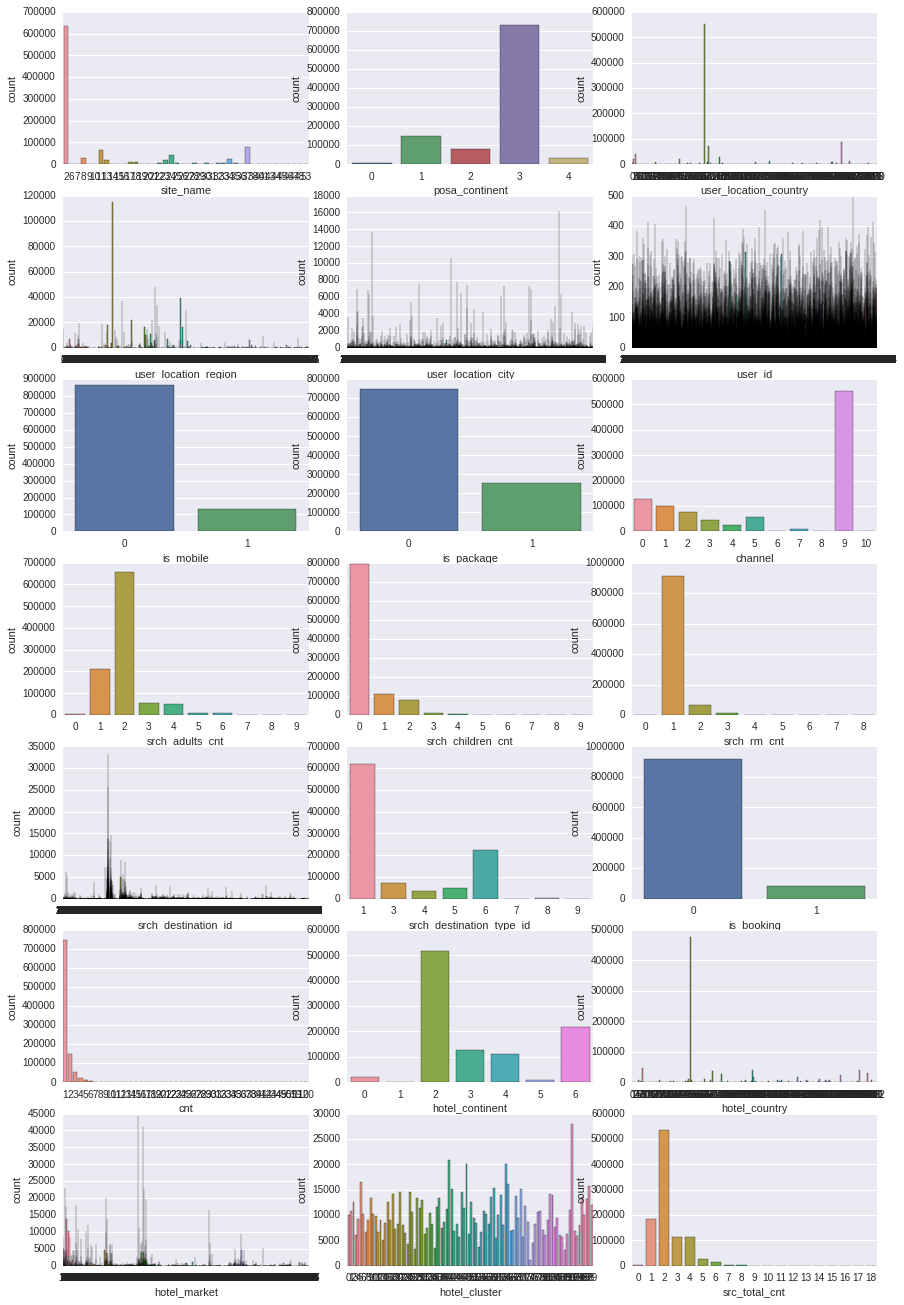

In [99]:
# plot all columns countplots
import numpy as np
rows = train.columns.size//3 - 1
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(12,18))
fig.tight_layout()
i = 0
j = 0
for col in train.columns:
    if j >= 3:
        j = 0
        i += 1
    # avoid to plot by date    
    if train[col].dtype == np.int64:
        sns.countplot(x=col, data=train, ax=axes[i][j])
        j += 1
    